# some sort of cv

In [6]:
import pandas as pd
import numpy as np
import sys
import os
import random
from pathlib import Path
import imageio
# import skimage
# import skimage.io
# import skimage.transform
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.graph_objs as go
# import plotly.figure_factory as ff
# from plotly import tools
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)
from scipy.io import loadmat
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from scipy.io import loadmat
# from keras.utils import to_categorical
import itertools

# from keras.utils import to_categorical
# import tensorflow_addons as tfa
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import PIL
import PIL.Image
import tensorflow as tf
import pathlib

ImportError: dlopen(/Users/fyenne/miniforge3/envs/siming/lib/python3.8/site-packages/cv2/cv2.cpython-38-darwin.so, 2): Library not loaded: /opt/homebrew/opt/ffmpeg/lib/libavcodec.58.dylib
  Referenced from: /Users/fyenne/miniforge3/envs/siming/lib/python3.8/site-packages/cv2/cv2.cpython-38-darwin.so
  Reason: image not found

In [14]:
# Thanks to https://www.kaggle.com/mosius/cnn-over-mnist
def load_mnist_dataset():
    """
    Load MNIST-original dataset

    Returns:
    - mnist_data -- an array of arrays in the shape of (784,)
- mnist_label -- an array of labels
    - classes -- array of labels classes(a set of labels)
    - shape -- shape of data item
    - channels_count -- channel count of data images
    """

    mnist = loadmat("./mnist-original.mat/mnist-original.mat")
    mnist_data = mnist["data"].T
    mnist_data = mnist_data.reshape(len(mnist_data), 28, 28, 1)
    mnist_label = mnist["label"][0]
    count = len(set(mnist_label))
    return mnist_data, mnist_label, count, (28, 28, 1)


In [15]:
# Download data from MNIST-original dataset
data, labels, classes_count, data_shape = load_mnist_dataset()
print("data shape: " + str(data.shape))
print("labels shape: " + str(labels.shape))
print("classes count: " + str(classes_count))

data shape: (70000, 28, 28, 1)
labels shape: (70000,)
classes count: 10


In [21]:
def plot_images_sample(X, Y):
    # Draw plot for images sample
    
    plt.figure(figsize=(10,10))
    rand_indicies = np.random.randint(len(X), size=25)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        index = rand_indicies[i]
        plt.imshow(np.squeeze(X[index]), cmap=plt.cm.binary)
        plt.xlabel(Y[index])
    plt.show()

# Draw plot for images sample
# plot_images_sample(data, labels)

In [25]:
def fe_data(df, target):
    # FE: scaling data and transform target to categorical
    df = df / 255.
    target = to_categorical(target)
    return df, target

In [26]:
# FE and data splitting
test_size_part = 0.1
x_train_orig, x_test_orig, y_train_orig, y_test_orig = train_test_split(data, labels, test_size=test_size_part, shuffle=True)
X_train, Y_train = fe_data(x_train_orig, y_train_orig)
X_test, Y_test = fe_data(x_test_orig, y_test_orig)

In [31]:
data_shape

(28, 28, 1)

In [30]:
# Thanks to https://www.kaggle.com/mosius/cnn-over-mnist
# Model building
model = models.Sequential([
        layers.Conv2D(8, kernel_size=(4, 4), \
            strides=(1, 1), padding='same', 
            activation='relu', input_shape=data_shape),
        layers.MaxPooling2D((8, 8), padding='same'),
        layers.Conv2D(16, kernel_size=(2, 2), strides=(1, 1), padding='same', activation='relu'),
        layers.MaxPooling2D((4, 4), padding='same'),
        layers.Flatten(),
        layers.Dense(classes_count)
    ])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         136       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 16)          528       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                170       
Total params: 834
Trainable params: 834
Non-trainable params: 0
__________________________________________________________

In [32]:
# Model training
epochs_num = 10
validation_split_part = 0.2
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, \
    epochs=epochs_num, 
    validation_split=validation_split_part)

Epoch 1/10
1575/1575 [==============================] - 26s 15ms/step - loss: 1.0148 - accuracy: 0.6971 - val_loss: 0.4538 - val_accuracy: 0.8651
Epoch 2/10
1575/1575 [==============================] - 22s 14ms/step - loss: 0.3824 - accuracy: 0.8845 - val_loss: 0.3271 - val_accuracy: 0.9017
Epoch 3/10
1575/1575 [==============================] - 23s 15ms/step - loss: 0.2979 - accuracy: 0.9098 - val_loss: 0.2763 - val_accuracy: 0.9167
Epoch 4/10
1575/1575 [==============================] - 21s 13ms/step - loss: 0.2569 - accuracy: 0.9207 - val_loss: 0.2471 - val_accuracy: 0.9243
Epoch 5/10
1575/1575 [==============================] - 21s 14ms/step - loss: 0.2302 - accuracy: 0.9291 - val_loss: 0.2247 - val_accuracy: 0.9320
Epoch 6/10
1575/1575 [==============================] - 23s 15ms/step - loss: 0.2116 - accuracy: 0.9346 - val_loss: 0.2167 - val_accuracy: 0.9353
Epoch 7/10
1575/1575 [==============================] - 22s 14ms/step - loss: 0.1963 - accuracy: 0.9379 - val_loss: 0.2061 -

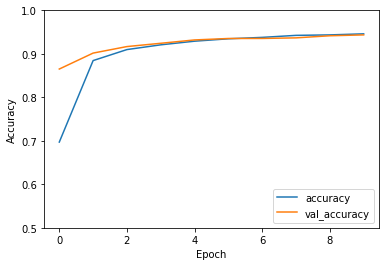

In [33]:
# Draw plot for CNN training
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [34]:
# Print test prediction accuracy
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print("test accuracy: " + str(test_acc))

219/219 - 1s - loss: 0.1750 - accuracy: 0.9444
test accuracy: 0.944428563117981
